# 第一章 求解非线性方程组

我们用 python 来做一些快速模拟和讨论. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

一个非线性方程的例子: 
\begin{equation}
  x - a \sin x - b = 0.
  \label{eq::Kepler}
\end{equation}
这是研究行星运动的开普勒(Kepler)方程, 这里 $a$ 是 $0 \sim 1$ 之间的数, 物理意义是偏心率, 当 $a = 0$ 时, 行星轨道就是一个圆, 而越接近 $1$, 则轨道越是一个扁椭圆; 而 $b$ 是平均近点角(Mean Anomaly), 是一个 $0 \sim 2 \pi$ 之间的数. 考虑一下如何数值求解该方程?(暴
力一把?) 先画出来?

In [2]:
def drawKepler(a, b):
    N = 100
    x = np.linspace(-10, 10, N)
    y = x - a * np.sin(x) - b
    plt.plot(x, y)
    plt.plot(x, np.zeros(N), '--')

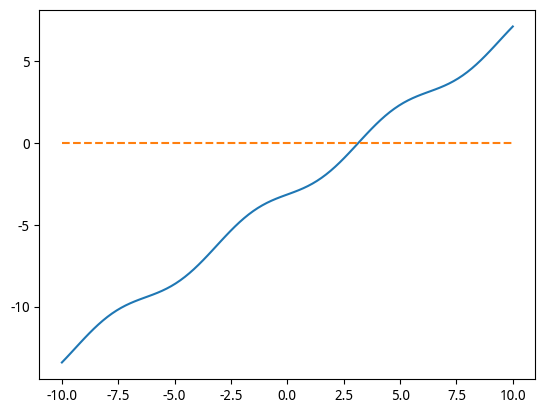

In [3]:
drawKepler(0.5, 3.14)

尽管这个方程很简单, 但是较难有意义地解析求解. 所以在实际工作中, 我们一般考虑数值求解.  

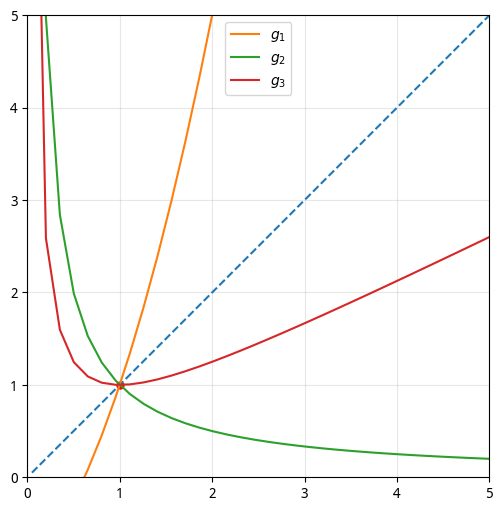

In [5]:
a = 1
x = np.linspace(0.05, 15, 100)

def g1(x):
    return x**2 + x - a

def g2(x):
    return a/x

def g3(x):
    return 1/2*(x + a/x)

# 用 fc-list 第一个英文名字
# 画图
plt.figure(figsize=(6, 6))
plt.plot(1, 1, marker='o', markersize=5, color='red')
plt.plot(x, x, '--')
plt.plot(x, g1(x), label="$g_1$")
plt.plot(x, g2(x), label="$g_2$")
plt.plot(x, g3(x), label="$g_3$")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

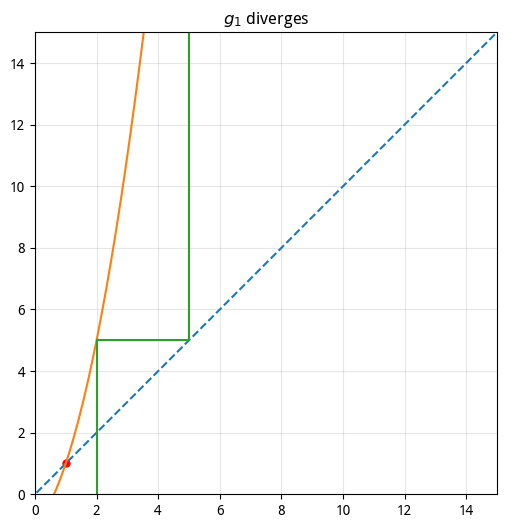

In [6]:
plt.figure(figsize=(6, 6))
plt.plot(1, 1, marker='o', markersize=5, color='red')
plt.plot(x, x, '--')
plt.plot(x, g1(x))
plt.plot([2, 2, g1(2), g1(2)], [0, g1(2), g1(2), g1(g1(2))])

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title("$g_1$ diverges")
plt.grid(True, alpha=0.3)
plt.show()

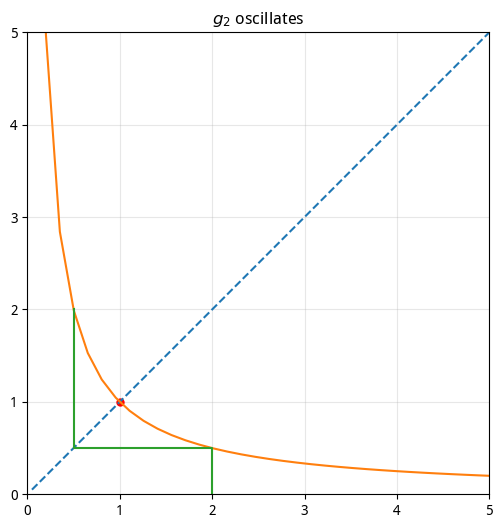

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(1, 1, marker='o', markersize=5, color='red')
plt.plot(x, x, '--')
plt.plot(x, g2(x))
plt.plot([2, 2, g2(2), g2(2)], [0, g2(2), g2(2), g2(g2(2))])

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("$g_2$ oscillates")
plt.grid(True, alpha=0.3)
plt.show()

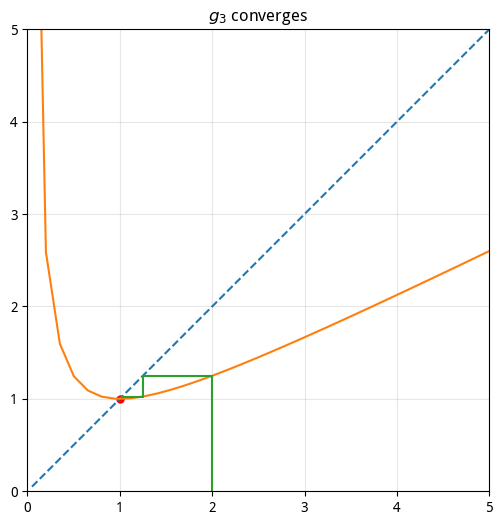

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(1, 1, marker='o', markersize=5, color='red')
plt.plot(x, x, '--')
plt.plot(x, g3(x))
plt.plot([2, 2, g3(2), g3(2), g3(g3(2))], [0, g3(2), g3(2), g3(g3(2)), g3(g3(2))])

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("$g_3$ converges")
plt.grid(True, alpha=0.3)
plt.show()